<a href="https://colab.research.google.com/github/LordAguaKate/Store/blob/Visualizaci%C3%B3nDatos/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



# Calcular el ingreso total facturación para cada tienda

In [2]:
ingreso_tienda_1 = tienda['Precio'].sum()
ingreso_tienda_2 = tienda2['Precio'].sum()
ingreso_tienda_3 = tienda3['Precio'].sum()
ingreso_tienda_4 = tienda4['Precio'].sum()

In [3]:
print(f"Ingreso Total Tienda 1: ${ingreso_tienda_1:,.2f}")
print(f"Ingreso Total Tienda 2: ${ingreso_tienda_2:,.2f}")
print(f"Ingreso Total Tienda 3: ${ingreso_tienda_3:,.2f}")
print(f"Ingreso Total Tienda 4: ${ingreso_tienda_4:,.2f}")

Ingreso Total Tienda 1: $1,150,880,400.00
Ingreso Total Tienda 2: $1,116,343,500.00
Ingreso Total Tienda 3: $1,098,019,600.00
Ingreso Total Tienda 4: $1,038,375,700.00


DataFrame para resumir los ingresos

In [4]:

data_ingresos = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso_Total': [ingreso_tienda_1, ingreso_tienda_2, ingreso_tienda_3, ingreso_tienda_4]
}

df_ingresos = pd.DataFrame(data_ingresos)
df_ingresos = df_ingresos.sort_values(by='Ingreso_Total', ascending=False)

print("Resumen de Ingresos por Tienda:")
df_ingresos

Resumen de Ingresos por Tienda:


,Tienda,Ingreso_Total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


# 2. Ventas por categoría

Calcular la cantidad de ventas por categoría para cada tienda

In [5]:
print("--- Ventas por Categoría - Tienda 1 ---")
ventas_categoria_1 = tienda['Categoría del Producto'].value_counts()
print(ventas_categoria_1)
print("\n" + "="*40 + "\n")

print("--- Ventas por Categoría - Tienda 2 ---")
ventas_categoria_2 = tienda2['Categoría del Producto'].value_counts()
print(ventas_categoria_2)
print("\n" + "="*40 + "\n")

print("--- Ventas por Categoría - Tienda 3 ---")
ventas_categoria_3 = tienda3['Categoría del Producto'].value_counts()
print(ventas_categoria_3)
print("\n" + "="*40 + "\n")

print("--- Ventas por Categoría - Tienda 4 ---")
ventas_categoria_4 = tienda4['Categoría del Producto'].value_counts()
print(ventas_categoria_4)

--- Ventas por Categoría - Tienda 1 ---
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64


--- Ventas por Categoría - Tienda 2 ---
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64


--- Ventas por Categoría - Tienda 3 ---
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count

DataFrame consolidado para comparar las ventas por categoría

In [6]:
df_ventas_cat_1 = ventas_categoria_1.to_frame(name='Ventas_Tienda_1')
df_ventas_cat_2 = ventas_categoria_2.to_frame(name='Ventas_Tienda_2')
df_ventas_cat_3 = ventas_categoria_3.to_frame(name='Ventas_Tienda_3')
df_ventas_cat_4 = ventas_categoria_4.to_frame(name='Ventas_Tienda_4')

# Concatenar los DataFrames por columnas (axis=1) para alinear por categoría (índice)
df_ventas_categorias_total = pd.concat(
    [df_ventas_cat_1, df_ventas_cat_2, df_ventas_cat_3, df_ventas_cat_4],
    axis=1
)

# Rellenar con 0 las categorías que no tuvieron ventas en alguna tienda y convertir a entero
df_ventas_categorias_total = df_ventas_categorias_total.fillna(0).astype(int)

print("Resumen Consolidado de Ventas por Categoría:")
df_ventas_categorias_total

Resumen Consolidado de Ventas por Categoría:


,Ventas_Tienda_1,Ventas_Tienda_2,Ventas_Tienda_3,Ventas_Tienda_4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


# 3. Calificación promedio de la tienda


Calcular la calificación promedio para cada tienda

In [7]:
calificacion_tienda_1 = tienda['Calificación'].mean()
calificacion_tienda_2 = tienda2['Calificación'].mean()
calificacion_tienda_3 = tienda3['Calificación'].mean()
calificacion_tienda_4 = tienda4['Calificación'].mean()

In [8]:
print(f"Calificación Promedio Tienda 1: {calificacion_tienda_1:.2f} estrellas")
print(f"Calificación Promedio Tienda 2: {calificacion_tienda_2:.2f} estrellas")
print(f"Calificación Promedio Tienda 3: {calificacion_tienda_3:.2f} estrellas")
print(f"Calificación Promedio Tienda 4: {calificacion_tienda_4:.2f} estrellas")

Calificación Promedio Tienda 1: 3.98 estrellas
Calificación Promedio Tienda 2: 4.04 estrellas
Calificación Promedio Tienda 3: 4.05 estrellas
Calificación Promedio Tienda 4: 4.00 estrellas


DataFrame para resumir las calificaciones

In [9]:
data_calificaciones = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificacion_Promedio': [calificacion_tienda_1, calificacion_tienda_2, calificacion_tienda_3, calificacion_tienda_4]
}

df_calificaciones = pd.DataFrame(data_calificaciones)
df_calificaciones = df_calificaciones.sort_values(by='Calificacion_Promedio', ascending=False)

print("Resumen de Calificaciones Promedio por Tienda:")
df_calificaciones

Resumen de Calificaciones Promedio por Tienda:


,Tienda,Calificacion_Promedio
2,Tienda 3,4.048326
1,Tienda 2,4.037304
3,Tienda 4,3.995759
0,Tienda 1,3.976685


# 4. Productos más y menos vendidos

Contar las ventas de cada producto en cada tienda

In [10]:
prod_ventas_1 = tienda['Producto'].value_counts()
prod_ventas_2 = tienda2['Producto'].value_counts()
prod_ventas_3 = tienda3['Producto'].value_counts()
prod_ventas_4 = tienda4['Producto'].value_counts()

In [12]:
# --- 5 MÁS vendidos ---
print("--- Productos MÁS Vendidos ---")
print("\n-- Tienda 1 --")
print(prod_ventas_1.head(5))
print("\n-- Tienda 2 --")
print(prod_ventas_2.head(5))
print("\n-- Tienda 3 --")
print(prod_ventas_3.head(5))
print("\n-- Tienda 4 --")
print(prod_ventas_4.head(5))

print("\n" + "="*40 + "\n")

# --- 5 MENOS vendidos ---
print("--- Productos MENOS Vendidos ---")
print("\n-- Tienda 1 --")
print(prod_ventas_1.tail(5))
print("\n-- Tienda 2 --")
print(prod_ventas_2.tail(5))
print("\n-- Tienda 3 --")
print(prod_ventas_3.tail(5))
print("\n-- Tienda 4 --")
print(prod_ventas_4.tail(5))

--- Productos MÁS Vendidos ---

-- Tienda 1 --
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

-- Tienda 2 --
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

-- Tienda 3 --
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

-- Tienda 4 --
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64


--- Productos MENOS Vendidos ---

-- Tienda 1 --
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY            

# 5. Envío promedio por tienda

Calcular el costo de envío promedio para cada tienda

In [14]:
envio_promedio_1 = tienda['Costo de envío'].mean()
envio_promedio_2 = tienda2['Costo de envío'].mean()
envio_promedio_3 = tienda3['Costo de envío'].mean()
envio_promedio_4 = tienda4['Costo de envío'].mean()

In [15]:
print(f"Costo de Envío Promedio Tienda 1: ${envio_promedio_1:,.2f}")
print(f"Costo de Envío Promedio Tienda 2: ${envio_promedio_2:,.2f}")
print(f"Costo de Envío Promedio Tienda 3: ${envio_promedio_3:,.2f}")
print(f"Costo de Envío Promedio Tienda 4: ${envio_promedio_4:,.2f}")

Costo de Envío Promedio Tienda 1: $26,018.61
Costo de Envío Promedio Tienda 2: $25,216.24
Costo de Envío Promedio Tienda 3: $24,805.68
Costo de Envío Promedio Tienda 4: $23,459.46


DataFrame para resumir los costos de envío

In [16]:
data_envios = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo_Envio_Promedio': [envio_promedio_1, envio_promedio_2, envio_promedio_3, envio_promedio_4]
}

df_envios = pd.DataFrame(data_envios)
df_envios = df_envios.sort_values(by='Costo_Envio_Promedio', ascending=True)

print("Resumen de Costo de Envío Promedio por Tienda (de menor a mayor):")
df_envios

Resumen de Costo de Envío Promedio por Tienda (de menor a mayor):


,Tienda,Costo_Envio_Promedio
3,Tienda 4,23459.457167
2,Tienda 3,24805.680373
1,Tienda 2,25216.235693
0,Tienda 1,26018.609580


# 6. Generando gráfico

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura un estilo visual
sns.set_style("whitegrid")
%matplotlib inline

1.  Ingresos Totales por Tienda

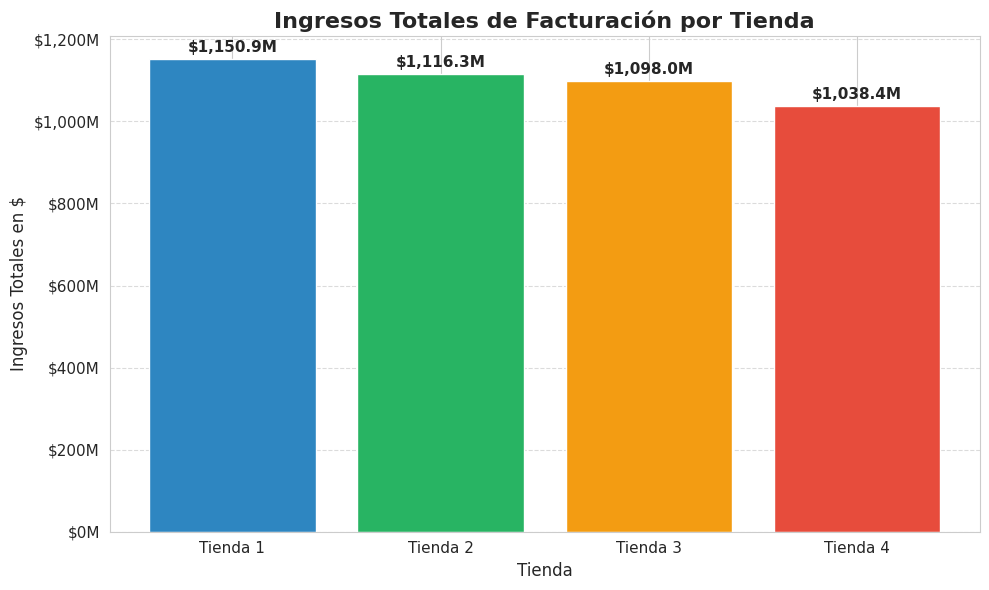

In [19]:
df_ingresos = df_ingresos.sort_values(by='Ingreso_Total', ascending=False)

plt.figure(figsize=(10, 6))
colores = ['#2E86C1', '#28B463', '#F39C12', '#E74C3C'] # Colores para cada tienda

barras = plt.bar(df_ingresos['Tienda'], df_ingresos['Ingreso_Total'], color=colores)

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2.0, yval + 10000000, # Posición del texto
             f'${yval/1_000_000:,.1f}M',                             # Formato del texto en Millones
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Ingresos Totales de Facturación por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos Totales en $', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

from matplotlib.ticker import FuncFormatter
def formato_millones(x, pos):
    'El argumento "x" es el valor y "pos" es la posición'
    return f'${x/1_000_000:,.0f}M'

formatter = FuncFormatter(formato_millones)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

2. Distribución de Ventas por Categoría

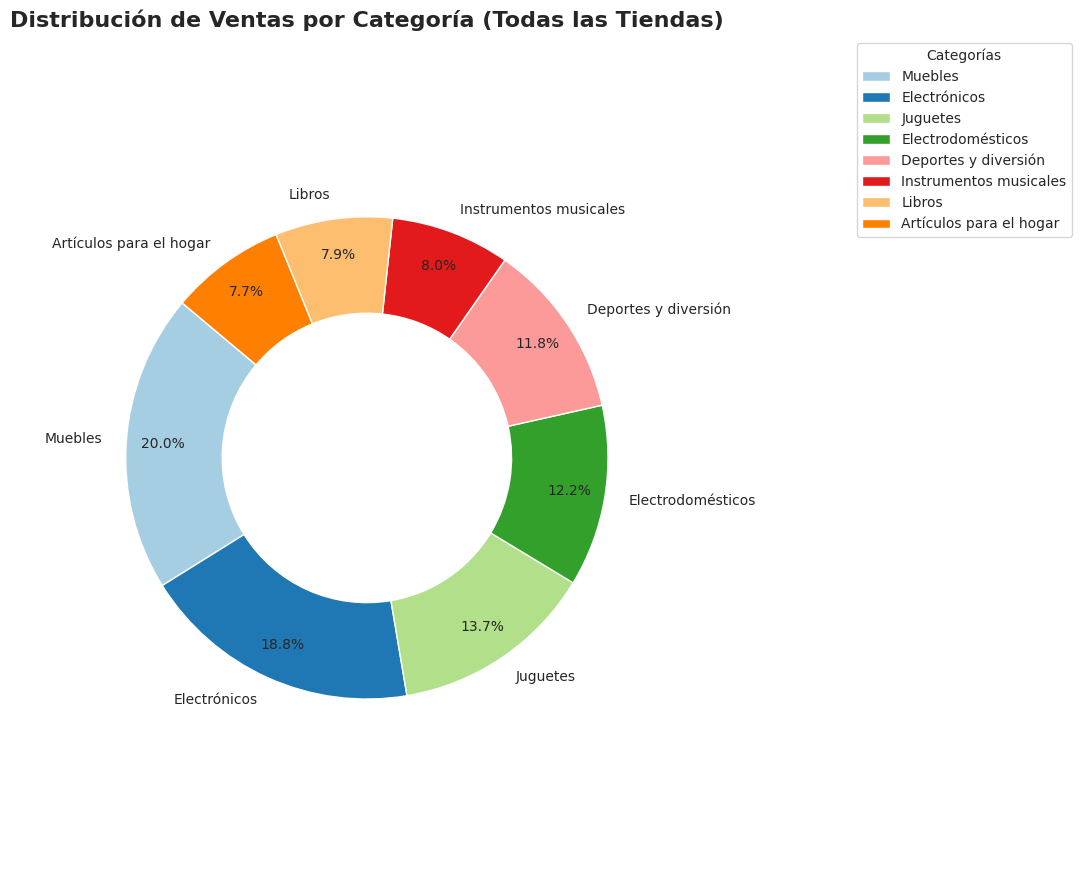

In [21]:
ventas_totales_categoria = df_ventas_categorias_total.sum(axis=1).sort_values(ascending=False)

plt.figure(figsize=(12, 9))
colores_pie = sns.color_palette('Paired', n_colors=len(ventas_totales_categoria))

plt.pie(ventas_totales_categoria,
        labels=ventas_totales_categoria.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colores_pie,
        pctdistance=0.85,
        wedgeprops=dict(width=0.4, edgecolor='w'))

plt.title('Distribución de Ventas por Categoría (Todas las Tiendas)', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.legend(ventas_totales_categoria.index, title="Categorías", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

3. Calificación Promedio vs. Costo de Envío

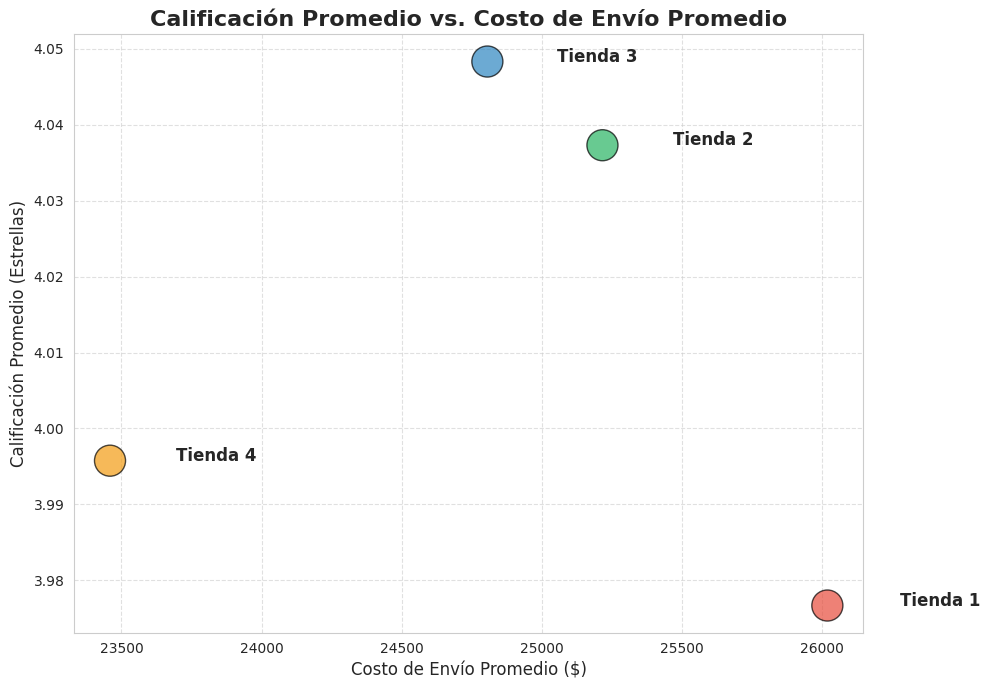

In [22]:
df_metricas = pd.merge(df_calificaciones, df_envios, on='Tienda')

plt.figure(figsize=(10, 7))

scatter = plt.scatter(df_metricas['Costo_Envio_Promedio'],
                      df_metricas['Calificacion_Promedio'],
                      s=500,
                      c=df_metricas.index.map({0: '#2E86C1', 1: '#28B463', 2: '#F39C12', 3: '#E74C3C'}),
                      alpha=0.7,
                      edgecolors='black')

plt.title('Calificación Promedio vs. Costo de Envío Promedio', fontsize=16, fontweight='bold')
plt.xlabel('Costo de Envío Promedio ($)', fontsize=12)
plt.ylabel('Calificación Promedio (Estrellas)', fontsize=12)

for i, row in df_metricas.iterrows():
    plt.text(row['Costo_Envio_Promedio'] * 1.01, # Posición X
             row['Calificacion_Promedio'],       # Posición Y
             row['Tienda'],                      # Texto
             fontsize=12, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

4. Productos Más Vendidos

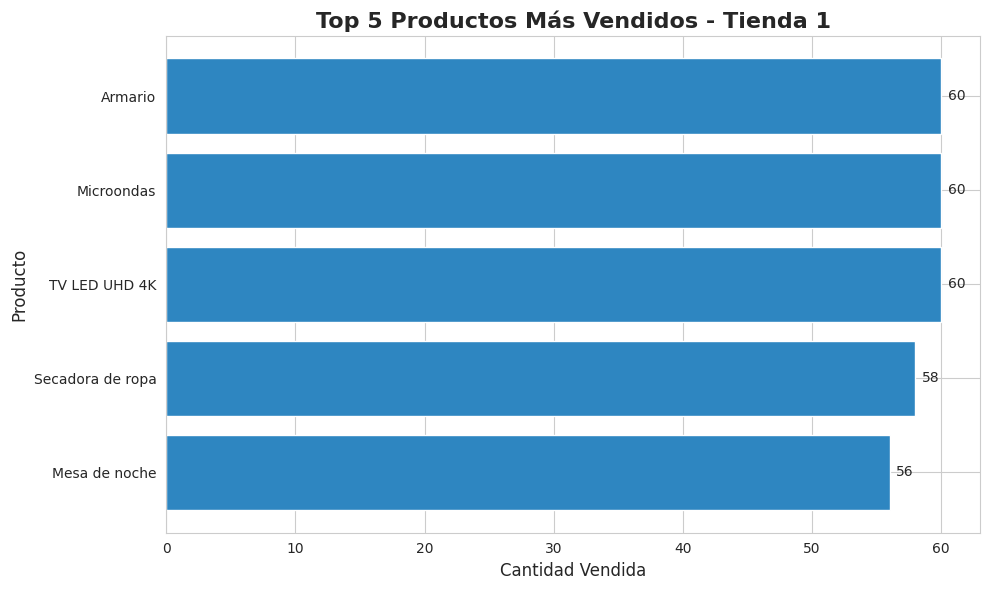

In [23]:
top_5_tienda_1 = prod_ventas_1.head(5).sort_values(ascending=True)

plt.figure(figsize=(10, 6))

barras_h = plt.barh(top_5_tienda_1.index, top_5_tienda_1.values, color='#2E86C1')

plt.title('Top 5 Productos Más Vendidos - Tienda 1', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad Vendida', fontsize=12)
plt.ylabel('Producto', fontsize=12)

for barra in barras_h:
    width = barra.get_width()
    plt.text(width + 0.5, barra.get_y() + barra.get_height()/2.0,
             f'{width}',
             ha='left', va='center')

plt.tight_layout()
plt.show()